# Check version of Tensorflow and install required libraries
ref: https://github.com/raghakot/keras-vis/blob/master/examples/resnet/attention.ipynb


# 정리하기

- 무엇을 하려고 하는지?
- 어떻게 준비하고 설치고 준비하는지
- 실행
- 문제점은?
- 해결 방법은?
- 결과는?
- 다음 단계는?


# Install Libraries (keras 2.1.5, keras-vis)

In [1]:
!ls
!pwd
!df -h
!python3 -c 'import tensorflow as tf; print(tf.__version__)'  # for Python 3
!pip install tensorflow-gpu==1.8.0
#!pip uninstall -y tensorflow
!pip uninstall -y keras-applications keras-preprocessing keras-vis keras
#!pip install --force-reinstall tensorflow==1.8.0
!pip install keras==2.1.5 keras-preprocessing keras-applications 

#!pip install keras-vis
!pip freeze

blue-keras215-fisheyes-crop.mp4  train_terminal_too_much_enhancement.py
heatmap_conv2d_1_1.mp4		 train_terminal_use_image_in_memory.py
heatmap_conv2d_1.mp4		 train_terminal_v2.py
test.mp4			 train_with_crop.py
train				 Untitled.ipynb
train.ipynb			 visualize.ipynb
train_terminal.py
/home/ec2-user/SageMaker/notebooks/robocar/customkeras
Filesystem      Size  Used Avail Use% Mounted on
devtmpfs         30G   72K   30G   1% /dev
tmpfs            30G     0   30G   0% /dev/shm
/dev/xvda1       74G   60G   15G  81% /
/dev/xvdf       4.8G  395M  4.2G   9% /home/ec2-user/SageMaker
1.8.0
Uninstalling Keras-Applications-1.0.6:
  Successfully uninstalled Keras-Applications-1.0.6
Uninstalling Keras-Preprocessing-1.0.5:
  Successfully uninstalled Keras-Preprocessing-1.0.5
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Uninstalling Keras-2.1.5:
  Successfully uninstalled Keras-2.1.5
  Using cached https://files.pythonhosted.org/packages/ba/65/e4aff762b8696ec0626a6654b1e73b

In [2]:
!pip install --upgrade pip
!pip install git+https://github.com/raghakot/keras-vis.git 

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (18.1)
  Cloning https://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-txn2qjvu
  Running setup.py bdist_wheel for keras-vis ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-s4wc9rz1/wheels/c5/ae/e7/b34d1cb48b1898f606a5cce08ebc9521fa0588f37f1e590d9f
Successfully built keras-vis


# Get Model Files


In [3]:
!aws s3 cp s3://kyoungsu-robocar-icn/models /home/ec2-user/SageMaker/models --recursive --region ap-northeast-2
!ls /home/ec2-user/SageMaker/models -alh


download: s3://kyoungsu-robocar-icn/models/blue-20181015-05-with-crop to ../../../models/blue-20181015-05-with-crop
download: s3://kyoungsu-robocar-icn/models/blue/blue-model-1008 to ../../../models/blue/blue-model-1008
download: s3://kyoungsu-robocar-icn/models/blue-model-1008-work to ../../../models/blue-model-1008-work
download: s3://kyoungsu-robocar-icn/models/blue/20181009-with-redcone.pkl to ../../../models/blue/20181009-with-redcone.pkl
download: s3://kyoungsu-robocar-icn/models/blue/blue-model-1009-gpu to ../../../models/blue/blue-model-1009-gpu
download: s3://kyoungsu-robocar-icn/models/blue-model-k2.1.5-20181017_124823_2-with-crop to ../../../models/blue-model-k2.1.5-20181017_124823_2-with-crop
download: s3://kyoungsu-robocar-icn/models/blue/blue-model-k2.1.5-20181017_020822-with-crop to ../../../models/blue/blue-model-k2.1.5-20181017_020822-with-crop
download: s3://kyoungsu-robocar-icn/models/blue-model-k2.1.5-20181017_124823_3-with-crop to ../../../models/blue-model-k2.1.5-

# Load model file

In [4]:

from tensorflow.python.keras.models import Model, load_model
from vis.utils import utils
from vis.visualization import visualize_saliency, overlay
from keras import activations

model_path = "/home/ec2-user/SageMaker/models/blue-20181015-05-with-crop"
model_path = "/home/ec2-user/SageMaker/models/blue-model-k2.1.5-20181017_124823-with-crop" # 30,50 40,30
model_path = "/home/ec2-user/SageMaker/models/blue-model-k2.1.5-20181017_124823_3-with-crop" #30,50 30,30
# Build the ResNet50 network with ImageNet weights
model = load_model(model_path)


# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
#layer_idx = utils.find_layer_idx(model, 'conv2d_5')
layer_idx = utils.find_layer_idx(model, 'angle_out')


# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.


In [5]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_in (InputLayer)             (None, 120, 160, 3)  0                                            
__________________________________________________________________________________________________
cropping2d_1 (Cropping2D)       (None, 40, 100, 3)   0           img_in[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 18, 48, 24)   1824        cropping2d_1[0][0]               
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 44, 32)   19232       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (

카메라로 저장한 이미지 확인

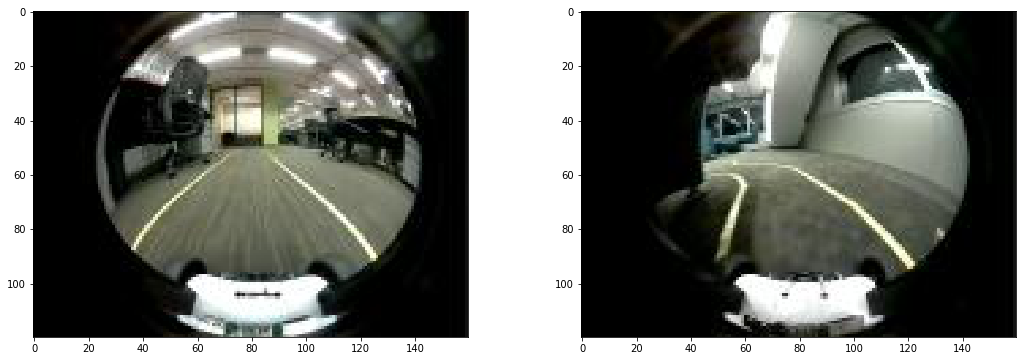

In [6]:
img1_path = '/tmp/data/tub_20181017_124823/3914_cam-image_array_.jpg'
img2_path = '/home/ec2-user/SageMaker/traindata/tub_20181019_102454_cleaned/960_cam-image_array_.jpg'
img1 = utils.load_img(img1_path)
img2 = utils.load_img(img2_path)

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)



불필요한 이미지가 너무 많으니, Crop

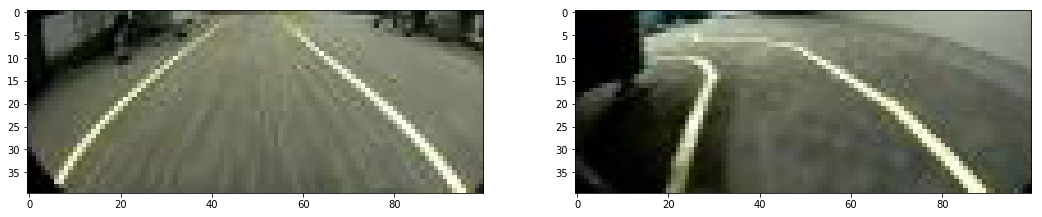

In [7]:



# should crop images
cropped_img1 = img1[50:90,30:130,:]
cropped_img2 = img2[50:90,30:130,:]

f, ax = plt.subplots(1, 2)
ax[0].imshow(cropped_img1)
ax[1].imshow(cropped_img2)

# Testing visualize_saliency
if you get error, close all sessions of sagemaker in running tab and re-run this jupyter notebook

(120, 160, 3)
(120, 160, 3)


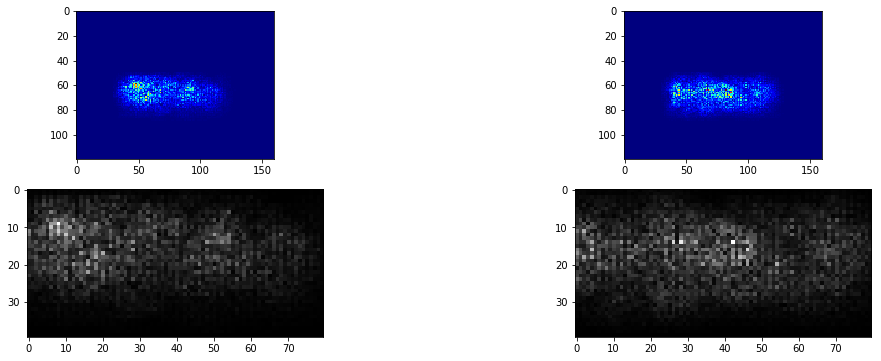

In [8]:
import numpy as np
from vis.visualization import visualize_saliency, overlay
f, ax = plt.subplots(2, 2)

CMAP = "jet"

print(img1.shape)

print(img2.shape)

DEFINED_FILTER_INDICES=12 #8
 
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    
    grads = visualize_saliency(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, seed_input=img)
    
    # visualize grads as heatmap
    orgimgs = np.stack((grads,) * 3, -1)
    
    ax[0][i].imshow(grads, cmap=CMAP)
    ax[1][i].imshow(orgimgs[50:90,40:120,:], cmap=CMAP)

    


# Visualize guided and relu

<Figure size 1296x432 with 0 Axes>

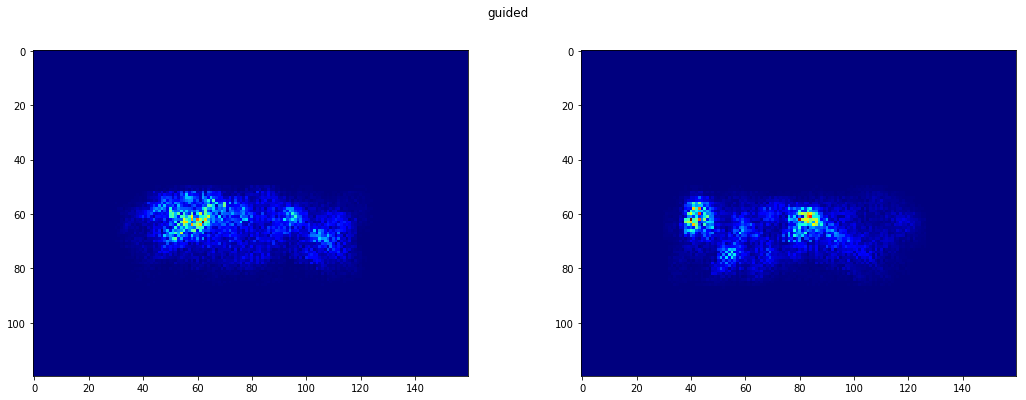

<Figure size 1296x432 with 0 Axes>

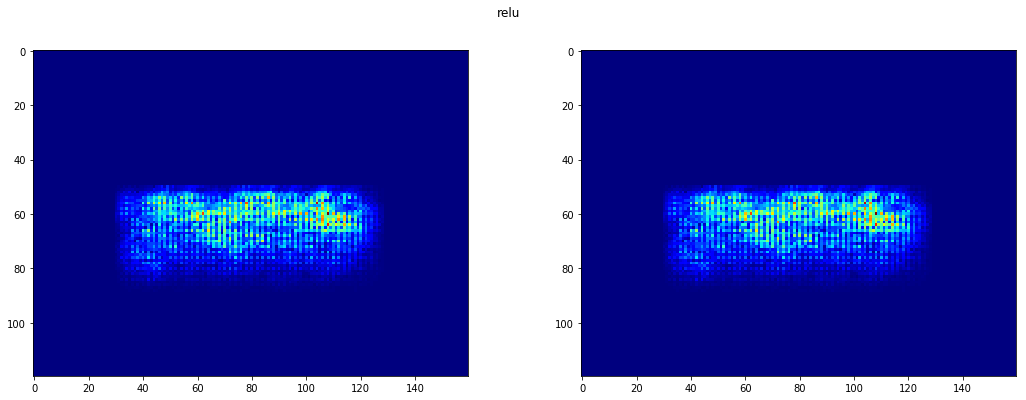

In [9]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap=CMAP)

# Make function for draw heatmap by layer and image arrays

In [10]:
!pip install opencv-python 

In [11]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam
import cv2
import time


def draw_heatmap_by_layer(layer_name):
    penultimate_layer = utils.find_layer_idx(model, layer_name)
    img_arr = [img1, img2]
    modifiers = [None, 'guided', 'relu']
    draw_heatmap(penultimate_layer, img_arr, modifiers)
    
    
def draw_heatmap(penultimate_layer, img_arr, modifiers, show=True,save=False):

    images = []
    for modifier in modifiers:
        plt.figure()
        
        if show:
            f, ax = plt.subplots(1, len(img_arr) )
            plt.suptitle("vanilla" if modifier is None else modifier)


        
        for i, img in enumerate(img_arr):  
            print("modifier:{} -> {}/{} file processing...".format(modifier, i+1, len(img_arr)))
            # 20 is the imagenet index corresponding to `ouzel`
            '''
            grads = visualize_cam(model, layer_idx, filter_indices=DEFINED_FILTER_INDICES, 
                                  seed_input=img, penultimate_layer_idx=penultimate_layer,
                                  backprop_modifier=modifier)        
            '''
            grads = visualize_cam(model, layer_idx=layer_idx, filter_indices=0, penultimate_layer_idx=penultimate_layer,
                                  seed_input=img, grad_modifier='small_values', backprop_modifier=modifier)
            # Lets overlay the heatmap onto original image. 
            
            jet_heatmap = np.uint8(cm.jet(grads)[...,:3] * 255)


            #ov = jet_heatmap[..., 0];
            #for j in range(1,2):
            #    ov = overlay(jet_heatmap[...,j], ov)
            
            jet_heatmap = cv2.resize(jet_heatmap, dsize=(100, 40), interpolation=cv2.INTER_CUBIC)

            crop_img = img[50:90, 30:130,:]

            #top_blank = np.zeros([120,160,3],dtype=np.uint8)
            #top_blank.fill(255) # or img[:] = 255
            #print("res.shape={}".format(res.shape))
            #final_image = overlay(res, img[45:,0:,0:])
            #jet_heatmap = np.concatenate((top_blank, res), axis=0)
            
            
            print("jet_heatmap.shape={}".format(jet_heatmap.shape))
            print("crop_img.shape={}".format(crop_img.shape))

            final_image = overlay(crop_img, jet_heatmap, 0.6)
            
            images.append(final_image)
            if show:
                ax[i].imshow(final_image)

            if save:
                filename = '/tmp/heatmaps/{}_heatmap_{:05d}.jpg'.format(modifier, i)
                print (filename)
                cv2.imwrite(filename, final_image)
            
            #ax.imshow(overlay(jet_heatmap, img))
    return images



# Draw Convolution2D_1

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

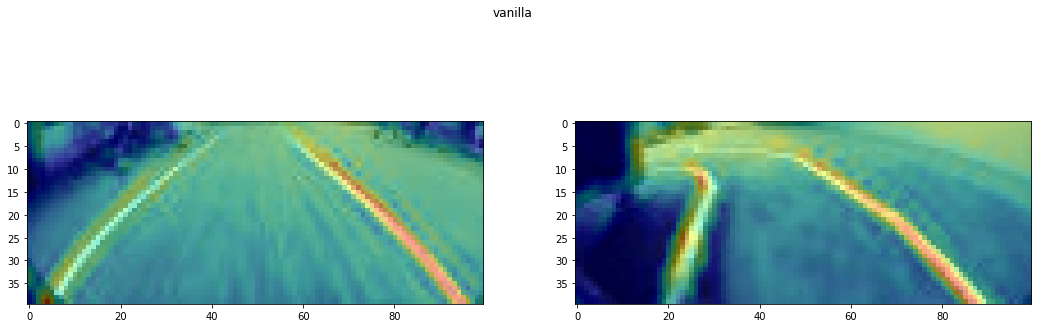

<Figure size 1296x432 with 0 Axes>

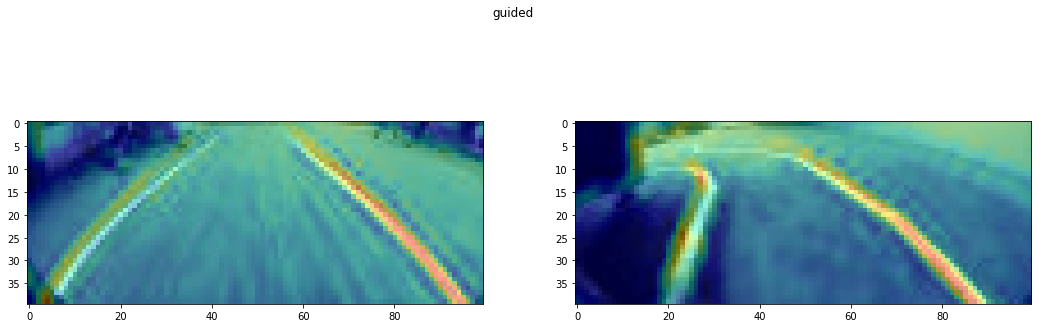

<Figure size 1296x432 with 0 Axes>

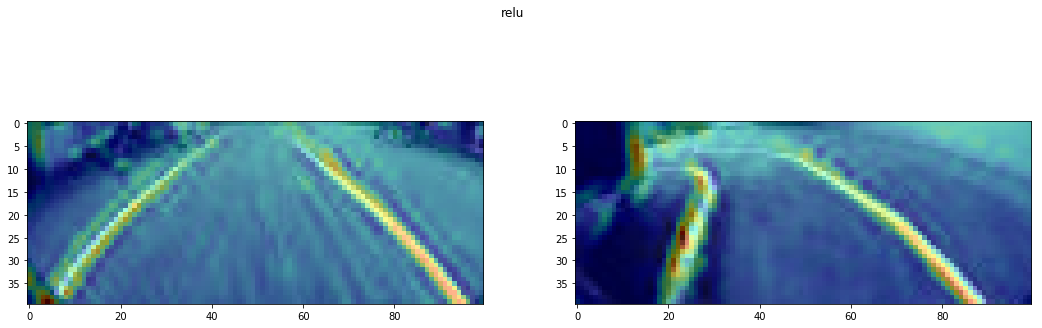

In [12]:
draw_heatmap_by_layer("conv2d_1")

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

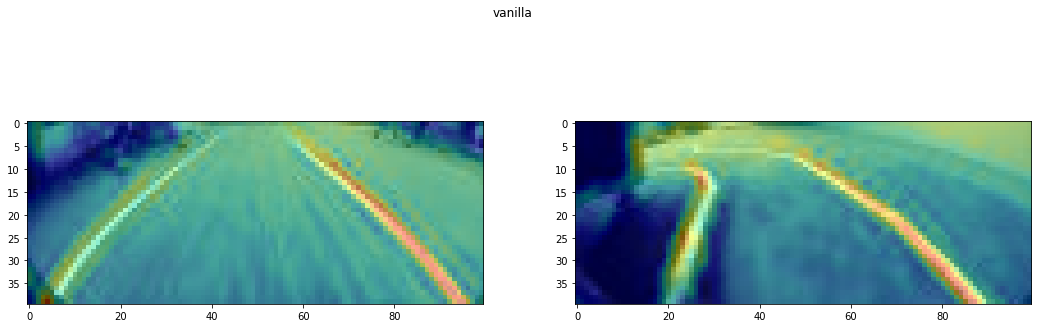

<Figure size 1296x432 with 0 Axes>

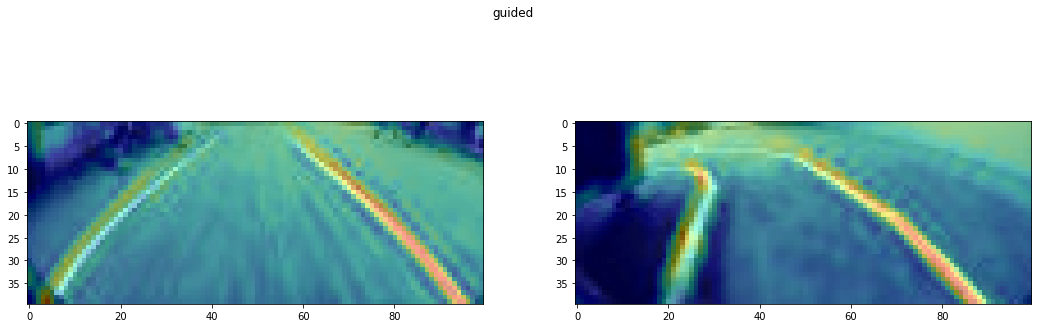

<Figure size 1296x432 with 0 Axes>

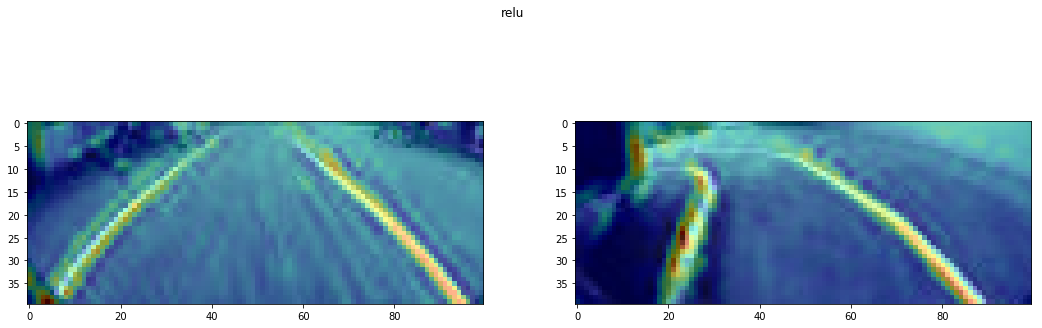

In [13]:
draw_heatmap_by_layer("conv2d_1")

# Draw Convolution2D_2

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

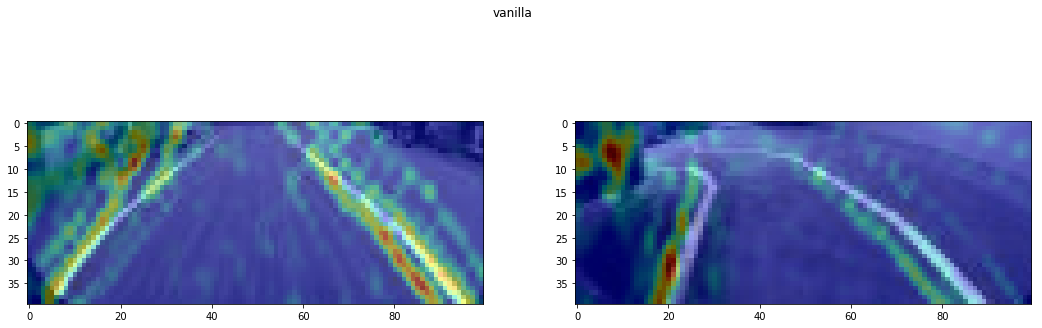

<Figure size 1296x432 with 0 Axes>

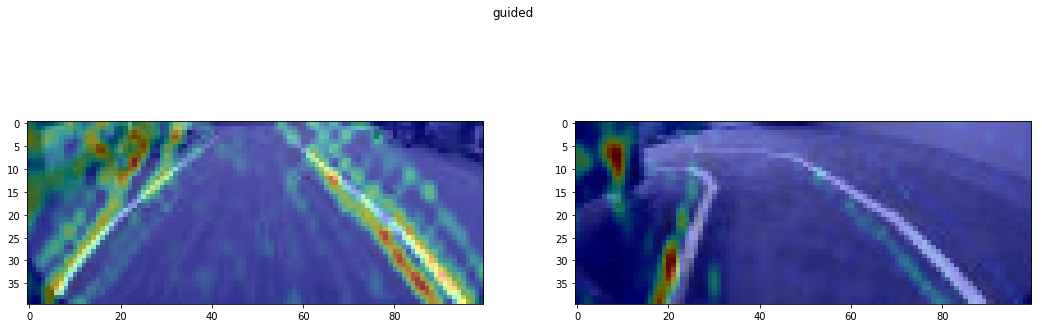

<Figure size 1296x432 with 0 Axes>

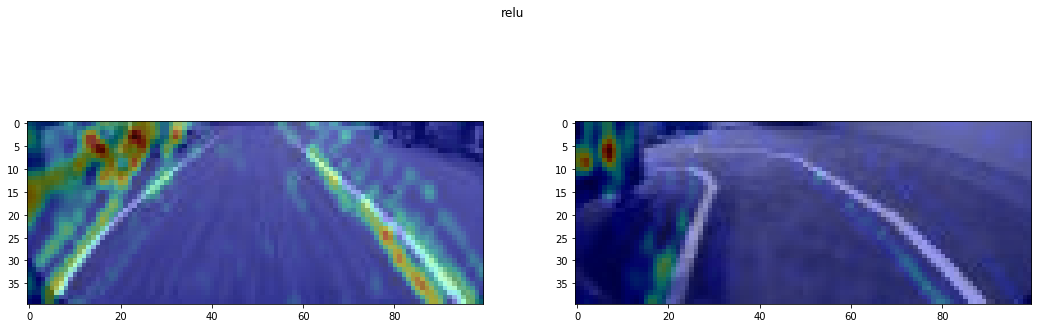

In [14]:
draw_heatmap_by_layer("conv2d_2")

# Draw Convolution2D_3

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

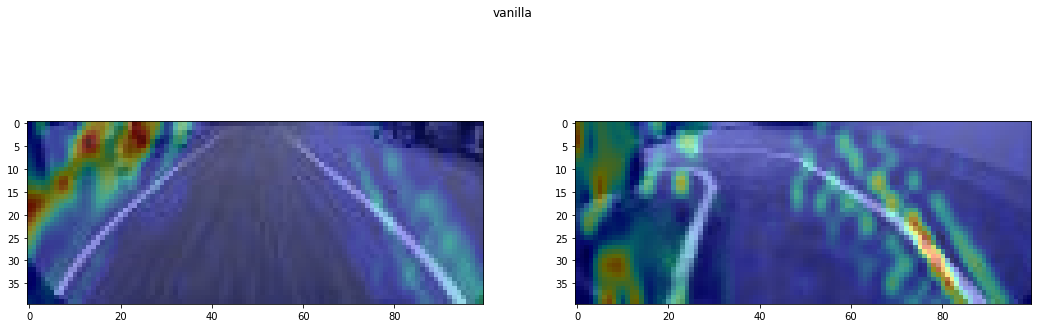

<Figure size 1296x432 with 0 Axes>

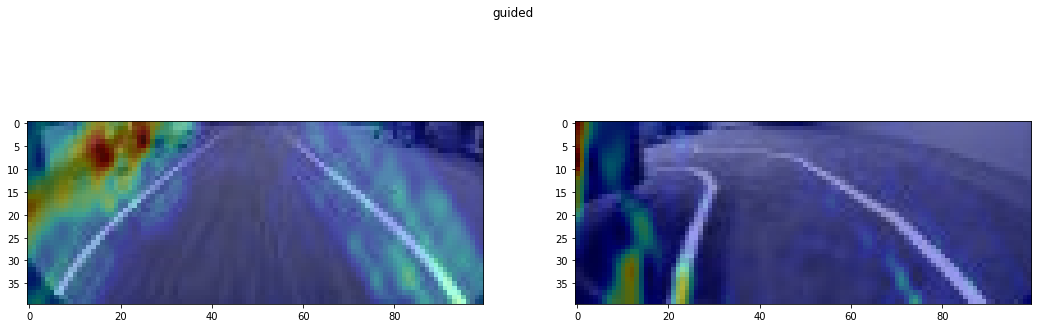

<Figure size 1296x432 with 0 Axes>

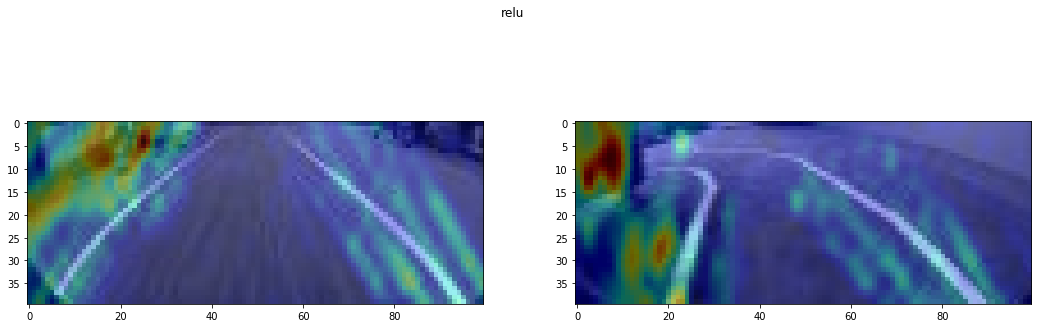

In [15]:
draw_heatmap_by_layer("conv2d_3")

# Draw Convolution2D_4

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

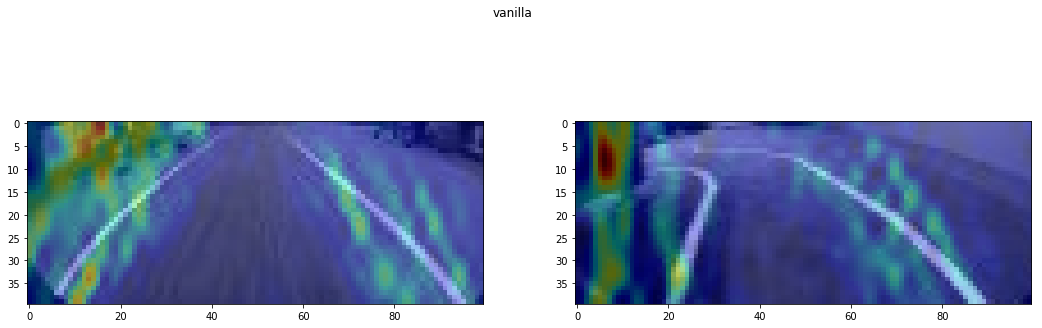

<Figure size 1296x432 with 0 Axes>

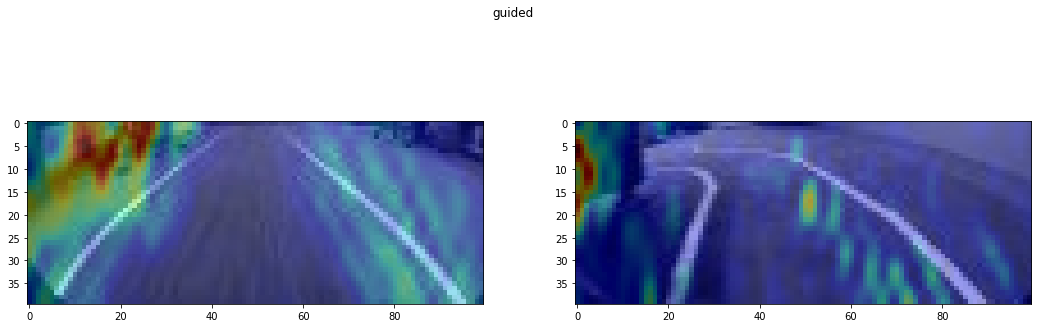

<Figure size 1296x432 with 0 Axes>

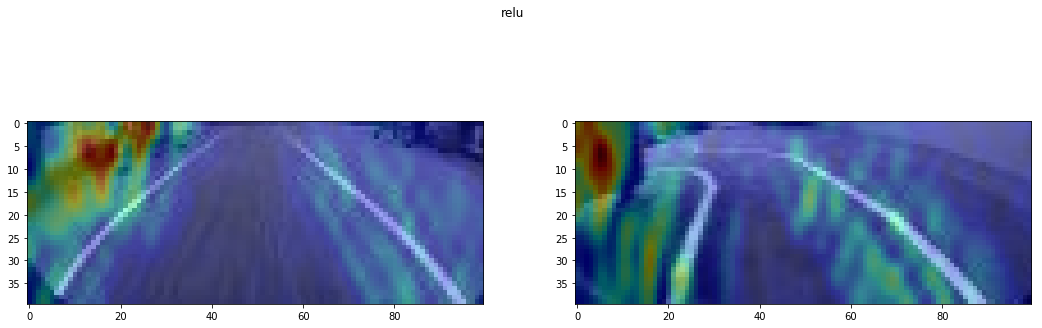

In [16]:
draw_heatmap_by_layer("conv2d_4")

# Draw Convolution2D_5

modifier:None -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:None -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:guided -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 1/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
modifier:relu -> 2/2 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)


<Figure size 1296x432 with 0 Axes>

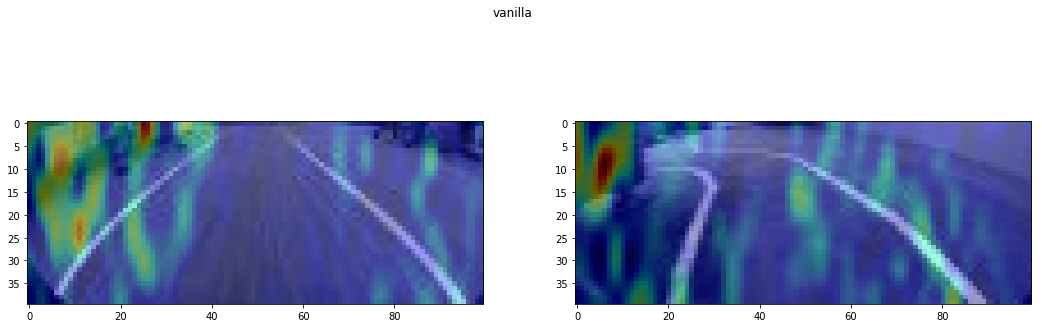

<Figure size 1296x432 with 0 Axes>

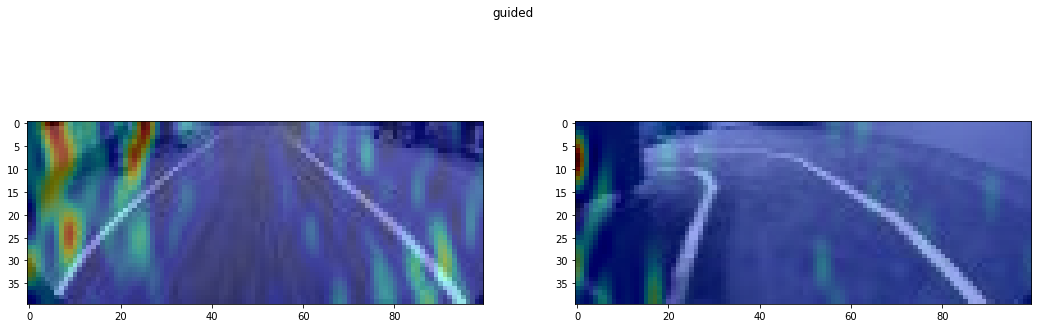

<Figure size 1296x432 with 0 Axes>

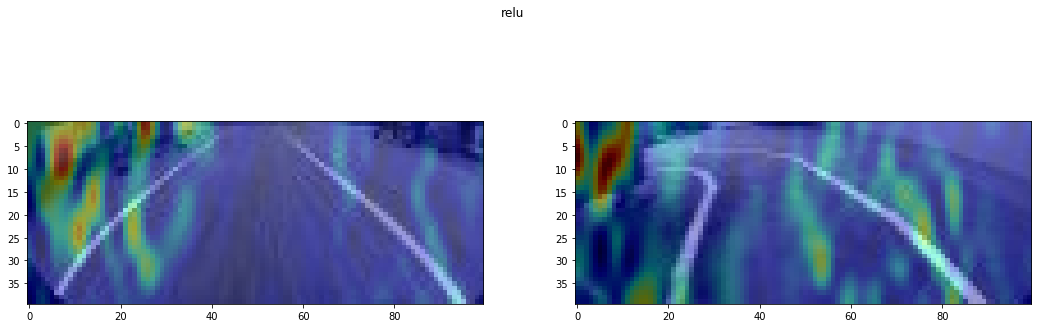

In [17]:
draw_heatmap_by_layer("conv2d_5")

In [23]:
#for i in range(1,1000):
#    utils.load_img({}_cam-image_array_.jpg'.format(i))
import os
training_path = '/tmp/data/tub_20181015_051246'
training_path = '/tmp/data/tub_20181017_124823'
training_folders = ['tub_20181008_055157', 'tub_20181017_020822', 'tub_20181018_040506', 'tub_20181019_102454_cleaned',
                    'tub-1003', 'tub_20181011_051043', 'tub_20181017_124823', 'tub_20181018_083433']
all_images = []

for folder in training_folders:
    nums = []
    full_path = '/tmp/data/' + folder
    for file in os.listdir(full_path):
        if file.endswith(".jpg"):
            nums.append(int(file.split("_")[0]))

    nums.sort()
    pos = 0
    max_pos = len(nums)

    while pos < max_pos:
        # print("nums[{}] = {}".format(pos, nums[pos]))
        if 0 == pos % 5:
            filename =  os.path.join(full_path, "{}_cam-image_array_.jpg".format(nums[pos]))
            all_images.append(utils.load_img(filename))
        pos += 1
    
print( "{} files loaded".format(len(all_images)))



21092 files loaded


In [ ]:
penultimate_layer = utils.find_layer_idx(model, "conv2d_5")
heatmap_images = draw_heatmap(penultimate_layer, all_images, [None], False, True)

modifier:None -> 1/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00000.jpg
modifier:None -> 2/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00001.jpg
modifier:None -> 3/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00002.jpg
modifier:None -> 4/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00003.jpg
modifier:None -> 5/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00004.jpg
modifier:None -> 6/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00005.jpg
modifier:None -> 7/21092 file processing...
jet_heatmap.shape=(40, 100, 3)
crop_img.shape=(40, 100, 3)
/tmp/heatmaps/None_heatmap_00006.jpg
modifier:None -> 8/2

# Make movie


In [21]:
!pip install moviepy
!sudo yum -y install ffmpeg

Loaded plugins: dkms-build-requires, priorities, update-motd, upgrade-helper
amzn-main                                                | 2.1 kB     00:00     
amzn-updates                                             | 2.5 kB     00:00     
libnvidia-container/x86_64/signature                     |  455 B     00:00     
Retrieving key from https://nvidia.github.io/libnvidia-container/gpgkey
libnvidia-container/x86_64/signature                     | 2.0 kB     00:00 !!! 
https://nvidia.github.io/libnvidia-container/amzn1/x86_64/repodata/repomd.xml: [Errno -1] repomd.xml signature could not be verified for libnvidia-container
Trying other mirror.
nvidia-container-runtime/x86_64/signature                |  455 B     00:00     
Retrieving key from https://nvidia.github.io/nvidia-container-runtime/gpgkey
nvidia-container-runtime/x86_64/signature                | 2.0 kB     00:00 !!! 
https://nvidia.github.io/nvidia-container-runtime/amzn1/x86_64/repodata/repomd.xml: [Errno -1] repomd.xml sign

In [ ]:


from moviepy.editor import *


clips = [ImageClip(m).set_duration(0.15) for m in heatmap_images]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("blue-keras215-fisheyes-crop-with-all.mp4", fps=10)

In [ ]:
TODO just point most attraction point in images


In [ ]:
A = np.arange(6 * 4).reshape((6,4))
print(A)
print(np.flip(A,0))
print(np.flip(A,1))
img1
f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
flip1 = np.flip(img1,1)
ax[1].imshow(flip1)
